#Analysing Networks with Networkx using Coauthorships in network science data

In [1]:
#Use this if notebook cant import libraries 
import sys
sys.path.append('/usr/local/lib/python3.4/dist-packages')
%matplotlib inline
import matplotlib
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/home/arshad/py3k/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
datadir = "/home/arshad/Downloads/"
G=nx.read_graphml(datadir + "netScience.graphml")

**Calculate some network statistics and centrality measures**

(array([  1.05000000e+03,   3.27000000e+02,   1.53000000e+02,
          1.90000000e+01,   1.10000000e+01,   2.50000000e+01,
          1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0.        ,  0.00214106,  0.00428212,  0.00642317,  0.00856423,
         0.01070529,  0.01284635,  0.01498741,  0.01712846,  0.01926952,
         0.02141058]),
 <a list of 10 Patch objects>)

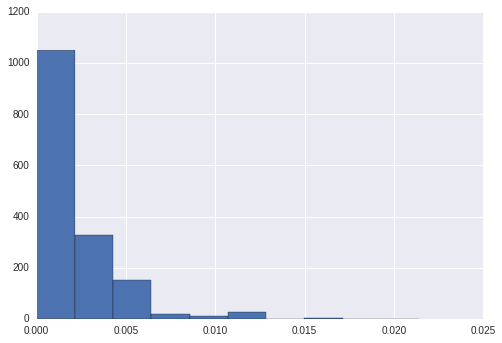

In [3]:
degree = list(nx.degree_centrality(G).values())
plt.hist(degree)

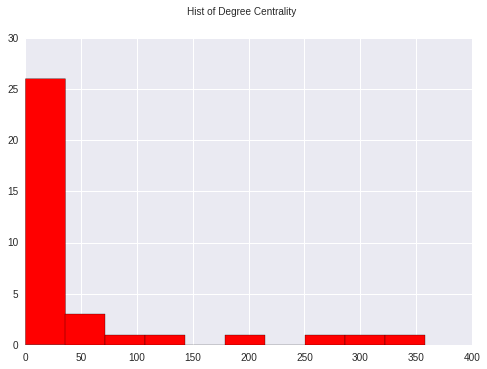

In [4]:
plt.hist(nx.degree_histogram(G),color='r')
plt.suptitle('Hist of Degree Centrality')

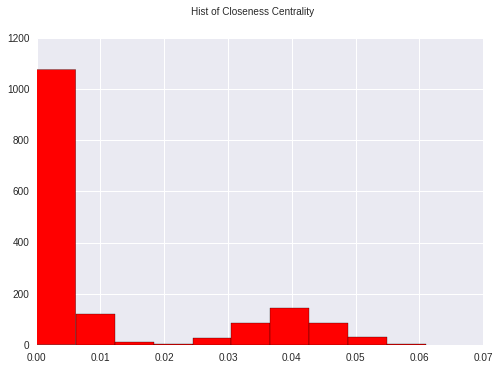

In [5]:
closeness = list(nx.closeness_centrality(G).values())
plt.hist(closeness, color='r')
plt.suptitle('Hist of Closeness Centrality')

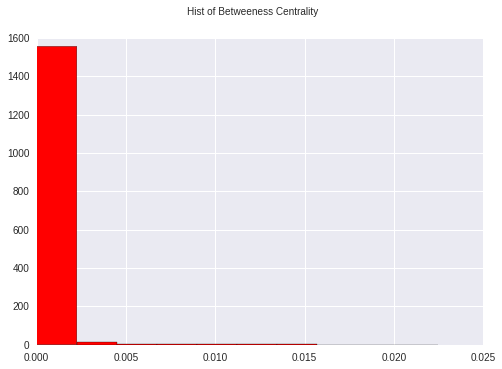

In [6]:
between = list(nx.betweenness_centrality(G).values())
plt.hist(between, color='r')
plt.suptitle('Hist of Betweeness Centrality')

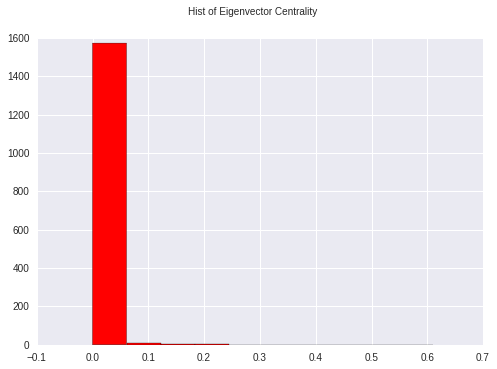

In [7]:
eig = list(nx.eigenvector_centrality_numpy(G).values())
plt.hist(eig, color='r')
plt.suptitle('Hist of Eigenvector Centrality')

In [8]:
connectedComp = nx.connected_components(G)
connectedComp = list(connectedComp)
countComp = len(connectedComp)
print ("This graph has ", countComp, " many connected components")

# It is already sorted but just to make sure, we get the largest component
compLengths = []
for i in range(0, countComp):
    compLengths.append(len(connectedComp[i]))

This graph has  396  many connected components


In [9]:
highestIndex = np.argmax(compLengths)
componentGraphs = list(nx.connected_component_subgraphs(G))
largestComponent = componentGraphs[highestIndex]

In [10]:

# betweenValues is a dictionary, let's get the values and keys in separate lists
values = list(nx.betweenness_centrality(G).values())
keys = list(nx.betweenness_centrality(G).keys())

# find the index of the node with highest betweeness centrality
highestIndex = np.argmax(values)
print("The node id ", keys[highestIndex], " has the betweeness centrality degree of ", values[highestIndex])

# and let's print this central node's label (we need to look at the graphml for the names of the attribute fields)
print (largestComponent.node[str(keys[highestIndex])]['label'])


The node id  78.0  has the betweeness centrality degree of  0.02245937511345881
NEWMAN, M


In [11]:
eigkeys = list(nx.eigenvector_centrality_numpy(G).keys())
# find the index of the node with highest eigenvector centrality
highestIndex = np.argmax(eig)
print("The node id ", eigkeys[highestIndex], " has the eigenvector centrality degree of ", eig[highestIndex])

# and let's print this central node's label (we need to look at the graphml for the names of the attribute fields)
print (largestComponent.node[str(keys[highestIndex])]['label'])

The node id  33.0  has the eigenvector centrality degree of  0.609587783347307
BARABASI, A


In [12]:
loadval = list(nx.load_centrality(G).values())
loadkeys = list(nx.load_centrality(G).keys())
highestIndex = np.argmax(loadval)
print("The node id ", loadkeys[highestIndex], " has the load centrality degree of ", loadval[highestIndex])

# and let's print this central node's label (we need to look at the graphml for the names of the attribute fields)
print (largestComponent.node[str(keys[highestIndex])]['label'])

The node id  78.0  has the load centrality degree of  0.022707582387756955
NEWMAN, M


In [13]:
overallAverage = []
# now on to looking at clustering coefficients
for i in range(0, countComp):
    clustCoeff = nx.clustering( componentGraphs[i])
    coeffVals = list(clustCoeff.values())
    overallAverage.append(np.average(coeffVals))
    print ("Component: ", i, " Size of the component: ", len(componentGraphs[i].nodes()),  " coefficient: ", np.average(coeffVals))

print ("Average clustering coefficent is: ", np.average(overallAverage))

Component:  0  Size of the component:  379  coefficient:  0.741230614293
Component:  1  Size of the component:  21  coefficient:  0.987218045113
Component:  2  Size of the component:  4  coefficient:  1.0
Component:  3  Size of the component:  5  coefficient:  1.0
Component:  4  Size of the component:  4  coefficient:  1.0
Component:  5  Size of the component:  2  coefficient:  0.0
Component:  6  Size of the component:  4  coefficient:  0.583333333333
Component:  7  Size of the component:  1  coefficient:  0.0
Component:  8  Size of the component:  3  coefficient:  1.0
Component:  9  Size of the component:  2  coefficient:  0.0
Component:  10  Size of the component:  3  coefficient:  1.0
Component:  11  Size of the component:  3  coefficient:  1.0
Component:  12  Size of the component:  2  coefficient:  0.0
Component:  13  Size of the component:  4  coefficient:  1.0
Component:  14  Size of the component:  1  coefficient:  0.0
Component:  15  Size of the component:  1  coefficient:  0.

In [14]:
nx.adjacency_spectrum(G)

array([ 9.72857365+0.j,  8.82463047+0.j,  7.03883616+0.j, ...,
        0.00000000+0.j,  0.00000000+0.j,  0.00000000+0.j])

In [16]:
nx.adjacency_matrix(G)

<1589x1589 sparse matrix of type '<class 'numpy.float64'>'
	with 5484 stored elements in Compressed Sparse Row format>

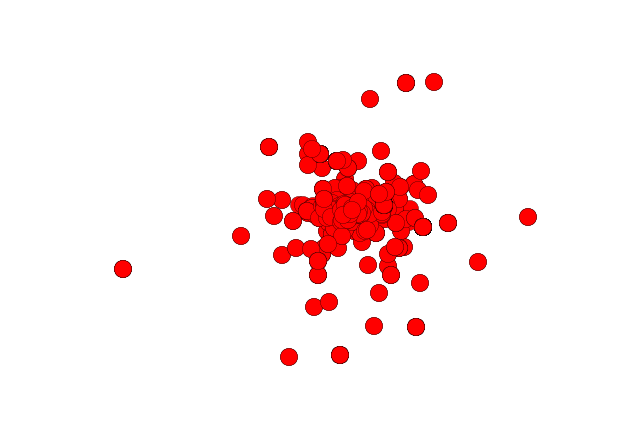

In [19]:
nx.draw_spectral(G)

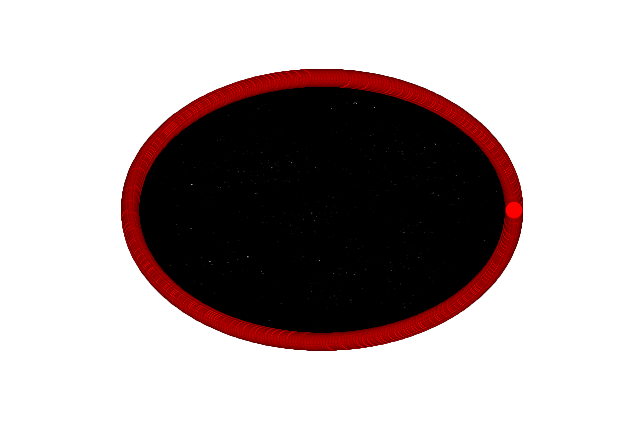

In [21]:
nx.draw_circular(G)

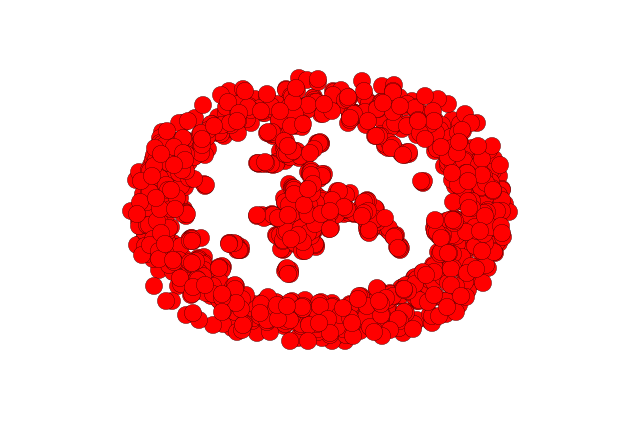

In [22]:
nx.draw_spring(G)